## Ex-1 "You're doing it wronge'

We as a computer scientists are always concerned about the space and time complexity of an algorithm. This is because our field demands to make algorithms time efficient and robust. 

In this article the auther Kamp shares a performance comparision of his algorithm B-Heap and Binary Heap specifically on caching purposes. He is known for developing an HTTP accelerator, called Varnish that works on web servers and its job is to cache recently accessed information by clients on server for faster request response. He ran into a situation of speeding up the server performance and what he figured out while dealing with pages in virtual memory the binary heap algorithm whose running time is O(nlog(n)) can actually be made 10x faster than it is write now. If we look at how the references are stored in VM page the traditional flaw in binary heap is the formula for finding the parent from child or child from parent.

The current n-> {2n,2n+1} formula leaves the heap to be built of virtual pages stacked one over the next. This actually takes the algorithm to traverse vertically in order to hit any particular VM page. This tends to slow down the performance because the comparisons are constantly shifting VM pages.On the other hand the approach Poul-Henning Kamp tried was to fill the pages vertically to match the direction we are traversing. This arrangement do increases the number of swaps or comparisons required but ensures most of the calculations are performed in a single page without a need to visiting more VM pages. It reduces the VM footprints and pagefaults.

In conclusion I would say "we all are doing it wronge".We should revisit the bogus computer model in our books and make sure to consider VM as an important parameter while designing and analyzing our algorithms.


## Ex-2 & Ex-3 "Kd-Trees"

I have Picked "Ground truth centroids and partitions" S2 Dataset. Build a k-d tree by selecting the split nodes a) from the data randomly and b) using a median value.

In [52]:
import numpy as np
import matplotlib.pyplot as plot

In [37]:
data = np.loadtxt("s2.txt")

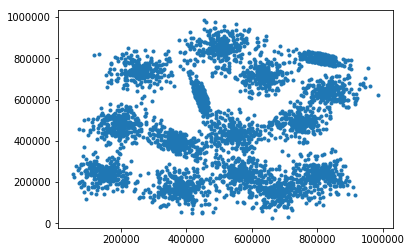

In [64]:
from numpy.random import rand

plot.plot(data[:,0],data[:,1,],".")
plot.show()

### Random & Median Split Implementation

I have used the Wikipedia recursive code for median value and modfied it to work with random split value as well.

In [7]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat


# Node Structure
class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))

# kd-tree random split
def kdtree_Random(point_list, depth=0):
    try:
        k = len(point_list[0]) # assumes all points have the same dimension
    except IndexError as e: # if not point_list:
        return None
    
    # Select axis based on depth so that axis cycles through all valid values
    axis = depth % k
    
    splitPoint = np.random.randint(0, len(point_list), 1, int)[0]

    # Create node and construct subtrees
    return Node(
        location=point_list[splitPoint],
        left_child=kdtree_Random(point_list[:splitPoint], depth + 1),
        right_child=kdtree_Random(point_list[splitPoint + 1:], depth + 1)
    )


# kd-tree Median Split
def kdtree_Median(point_list, depth=0):
    try:
        k = len(point_list[0]) # assumes all points have the same dimension
    except IndexError as e: # if not point_list:
        return None
    
    # Select axis based on depth so that axis cycles through all valid values
    axis = depth % k
    
    point_list.sort(axis=axis)
    splitPoint = len(point_list) // 2
    
    # Create node and construct subtrees
    return Node(
        location=point_list[splitPoint],
        left_child=kdtree_Median(point_list[:splitPoint], depth + 1),
        right_child=kdtree_Median(point_list[splitPoint + 1:], depth + 1)
    )

# Constructed Trees

random_tree = kdtree_Random(data)
median_tree = kdtree_Median(data)



### Path Length Calculation


In [34]:
random_lengths = []
median_lengths = []

def Calculate_Random_Weights(node, weight=0):
           
    if node is not None:
        
        if node.left_child is node.right_child is None: 
                random_lengths.append(weight)

        Calculate_Random_Weights(node.left_child, weight+1)
        Calculate_Random_Weights(node.right_child, weight+1)
        

#-----------------------------------------------------------------------------------
        
def Calculate_Median_Weights(node, weight=0):
           
    if node is not None:
        
        if node.left_child is node.right_child is None: 
                median_lengths.append(weight)

        Calculate_Median_Weights(node.left_child, weight+1)
        Calculate_Median_Weights(node.right_child, weight+1)

        
#-----------------------------------------------------------------------------------

# Length Calculation

Calculate_Random_Weights(random_tree)

Calculate_Median_Weights(median_tree)

#-----------------------------------------------------------------------------------

# Length Sorted for Histogram

random_lengths.sort()

median_lengths.sort()


### Histograms


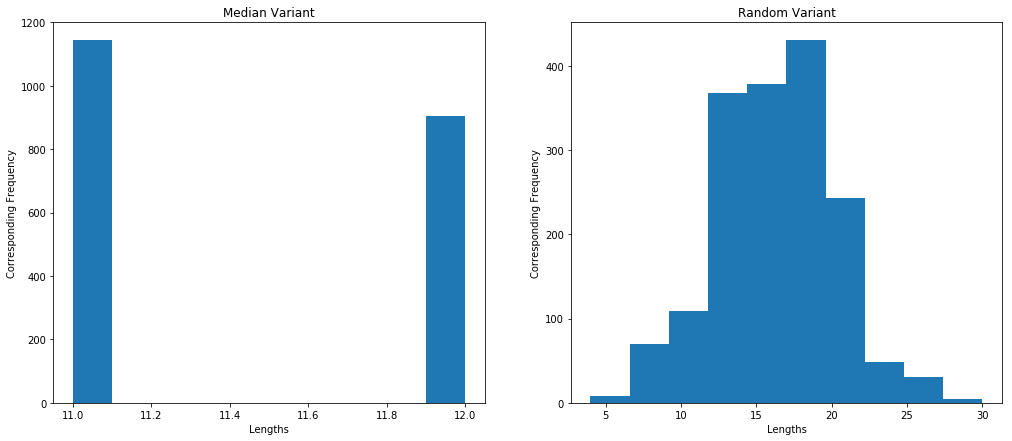

In [33]:
import matplotlib.pyplot as plot

plot.figure(figsize=(17, 7))
plot.subplot(1, 2, 2)
plot.hist(random_lengths, bins=10)
plot.title('Random Variant');
plot.ylabel('Corresponding Frequency');
plot.xlabel('Lengths');

plot.subplot(1, 2, 1)
plot.hist(median_lengths, bins=10)
plot.title('Median Variant');
plot.ylabel('Corresponding Frequency');
plot.xlabel('Lengths');




### My Thoughts


According to the above histograms, I believe the median splits variant in figure-1 is quite balanced compared to random split. As I have calculated the frequency of the occurences of the path lengths, The path lengths in median splits are either 11 or 12 Max. The data points are distributed in such a way that there is no small or large sub-tree they are almost equally balanced. The reason for this quite obvious because in median split we made sure to divide equall number of points in quadrants when spliting.

On the other hand the random variant tree is skewed a little. The paths lengths starting from root varries and the maximum height is 30 comparing to median variant which is only 12 in that case. This makes it the data points distribution uneven. Due to this reason the random variant kd-tree in figure-2 is un-balanced.

## Ex-4

The concept of dividing a hyperplane is that we choose two random points let’s say A and B, then we calculate the sloop of the line on which these two points are residing. 

Suppose,
                               
                 A =(x , y)
                
                B =(x_o , y_o)
                
					
According to the Line slope formula,


                m=(y-y_o)/(x-x_o)

The purpose of finding slope is the by finding the slope and knowing these two points in a 2D space we can actually calculate the equation of line by substituting the values of m and one of the points.
So we will the final equation looking something like this..	

                y = mx+b

            Where ‘b’ is a constant.
Now we are just taking the center point of these two points by taking average of these two points (A+B/2) and after finding the mid-point on the particular line we just draw a perpendicular on our first line passing through the center point. We can find the slope of perpendicular line by this formula.

            m=-1/m_perpendicular

The purpose of making this perpendicular line is that we are cutting the data set into two halves based on our previously chosen two points (Random Projection) and then we use the equation of this new line as a reference and we project the points on that line to see if they lie on the left side of the or right side of the line.

These are the cases,

- If mx+b-y > 0 then the point is located on the right hand side of the line
- If mx+b-y < 0 then the point is located on the left hand side of the line
- If mx+b-y = 0 then the point is located on the line

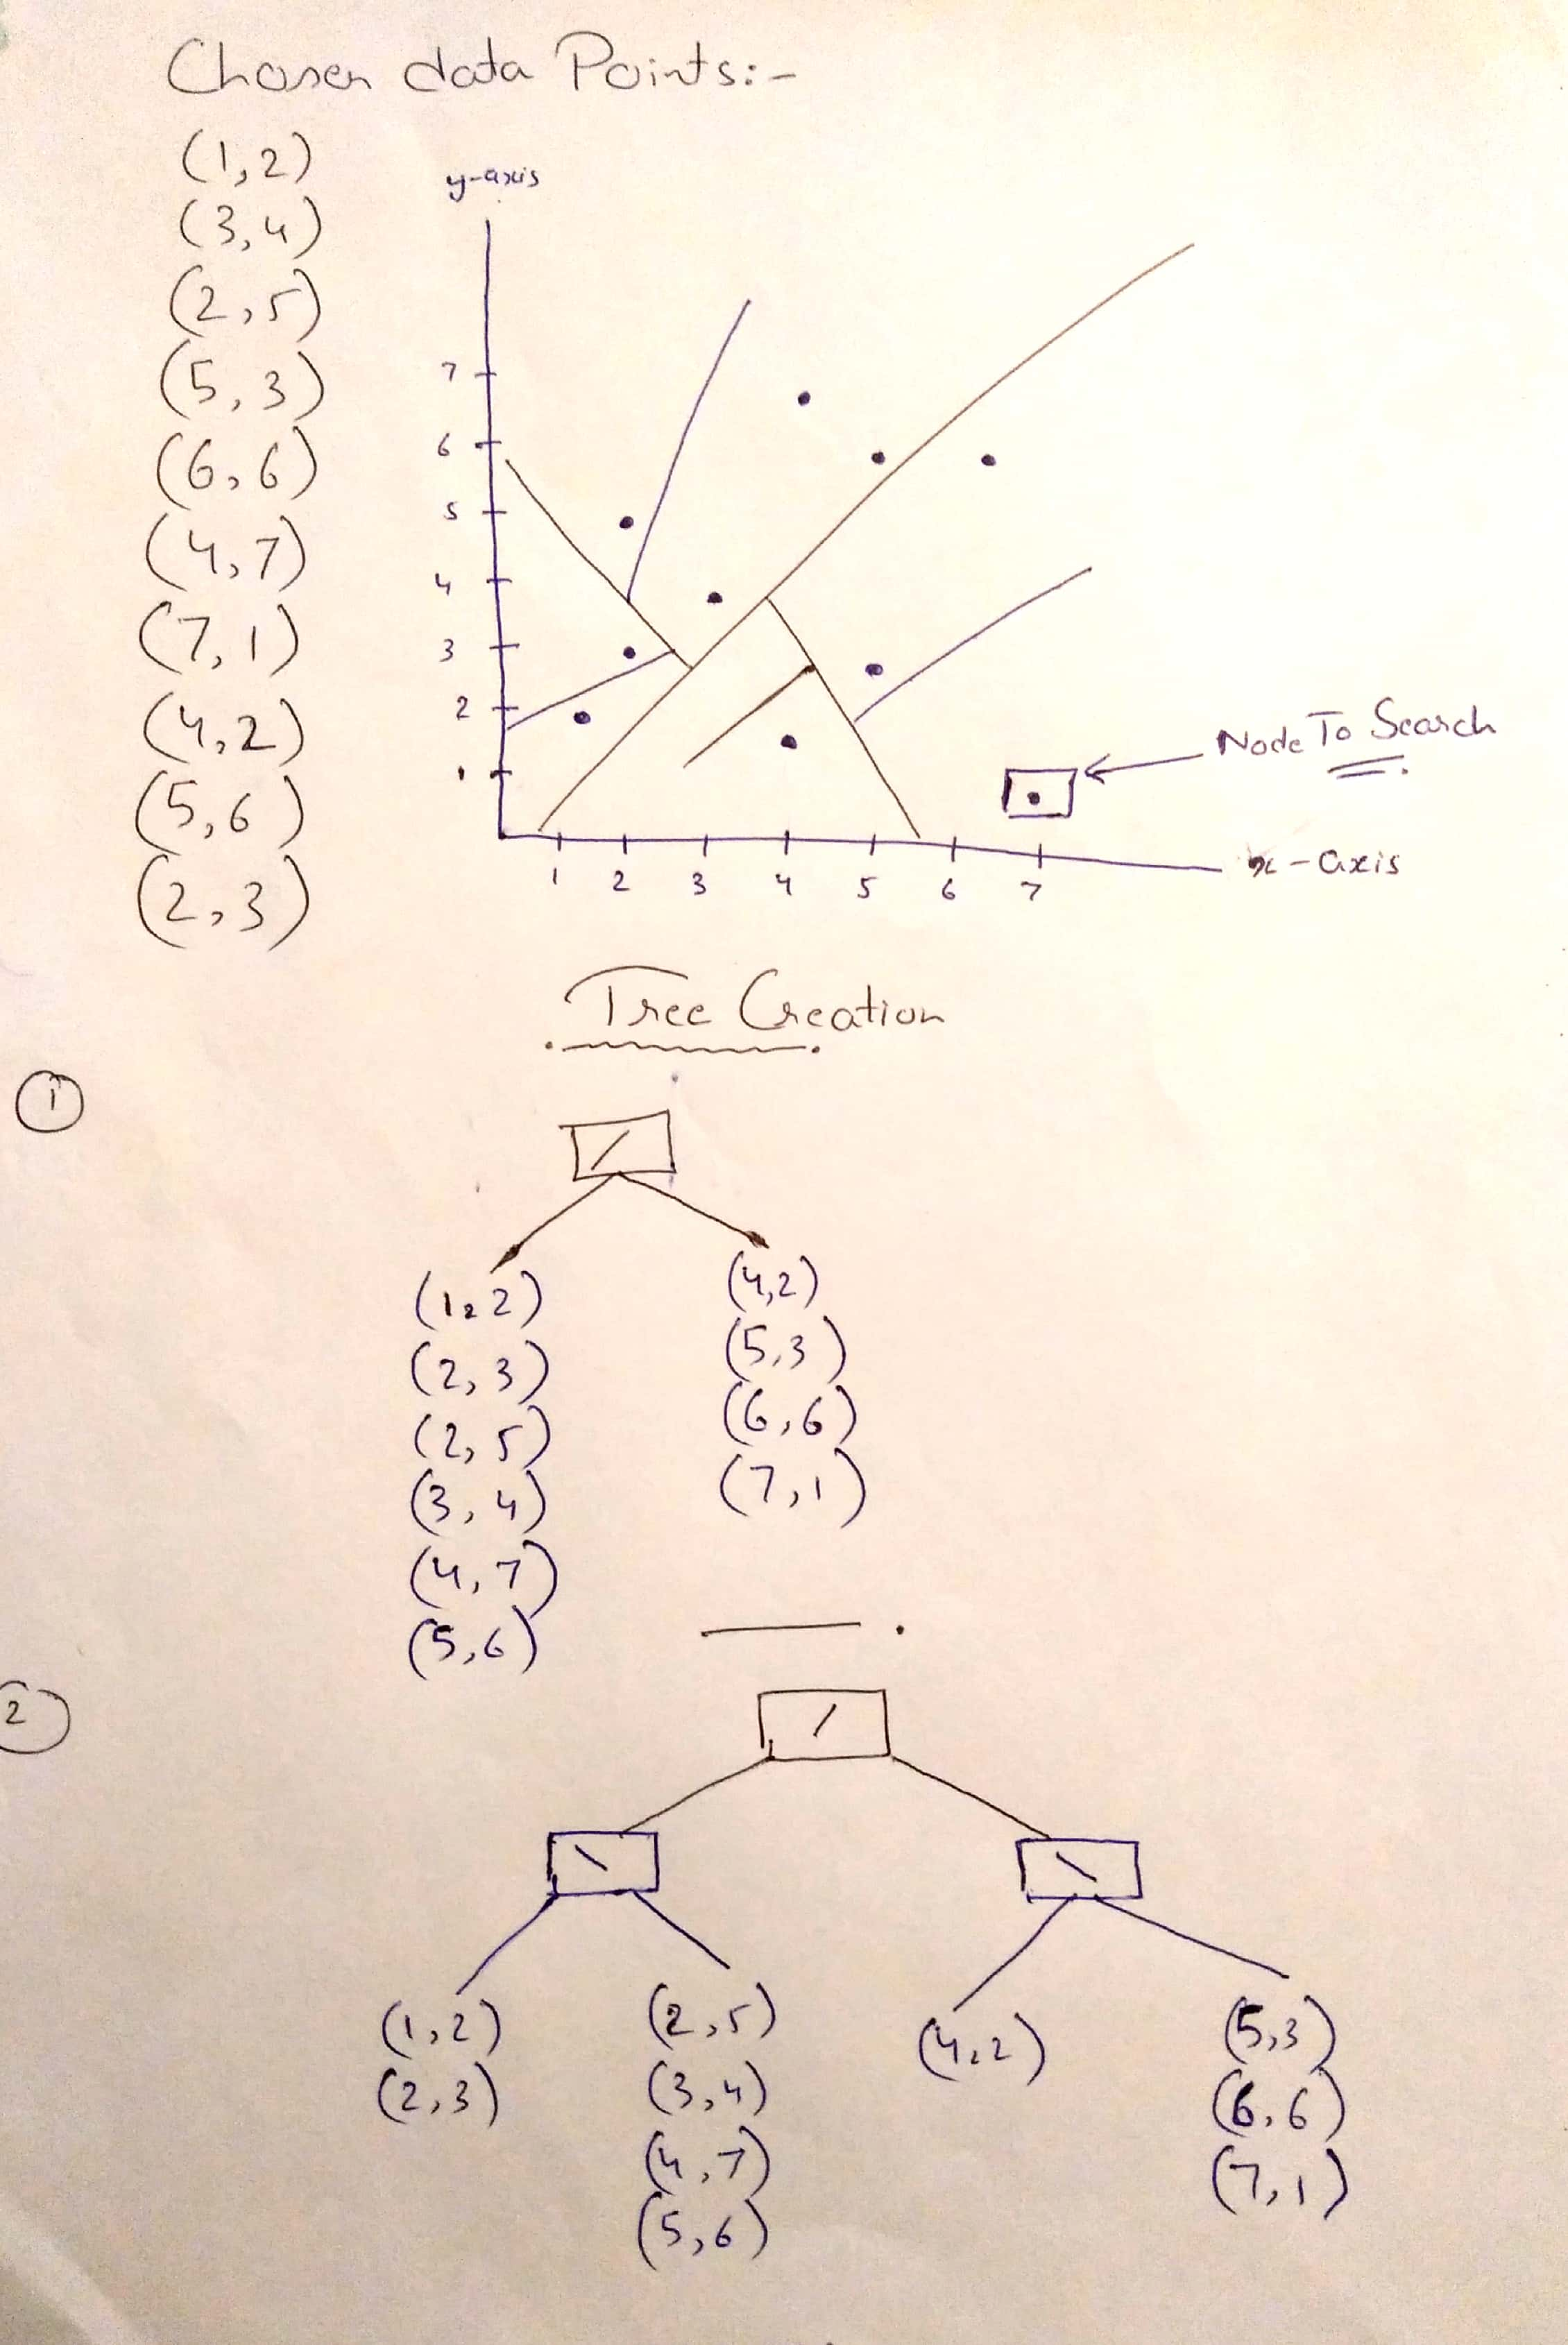

In [4]:

from IPython.display import Image
Image(filename='pic0.jpg')

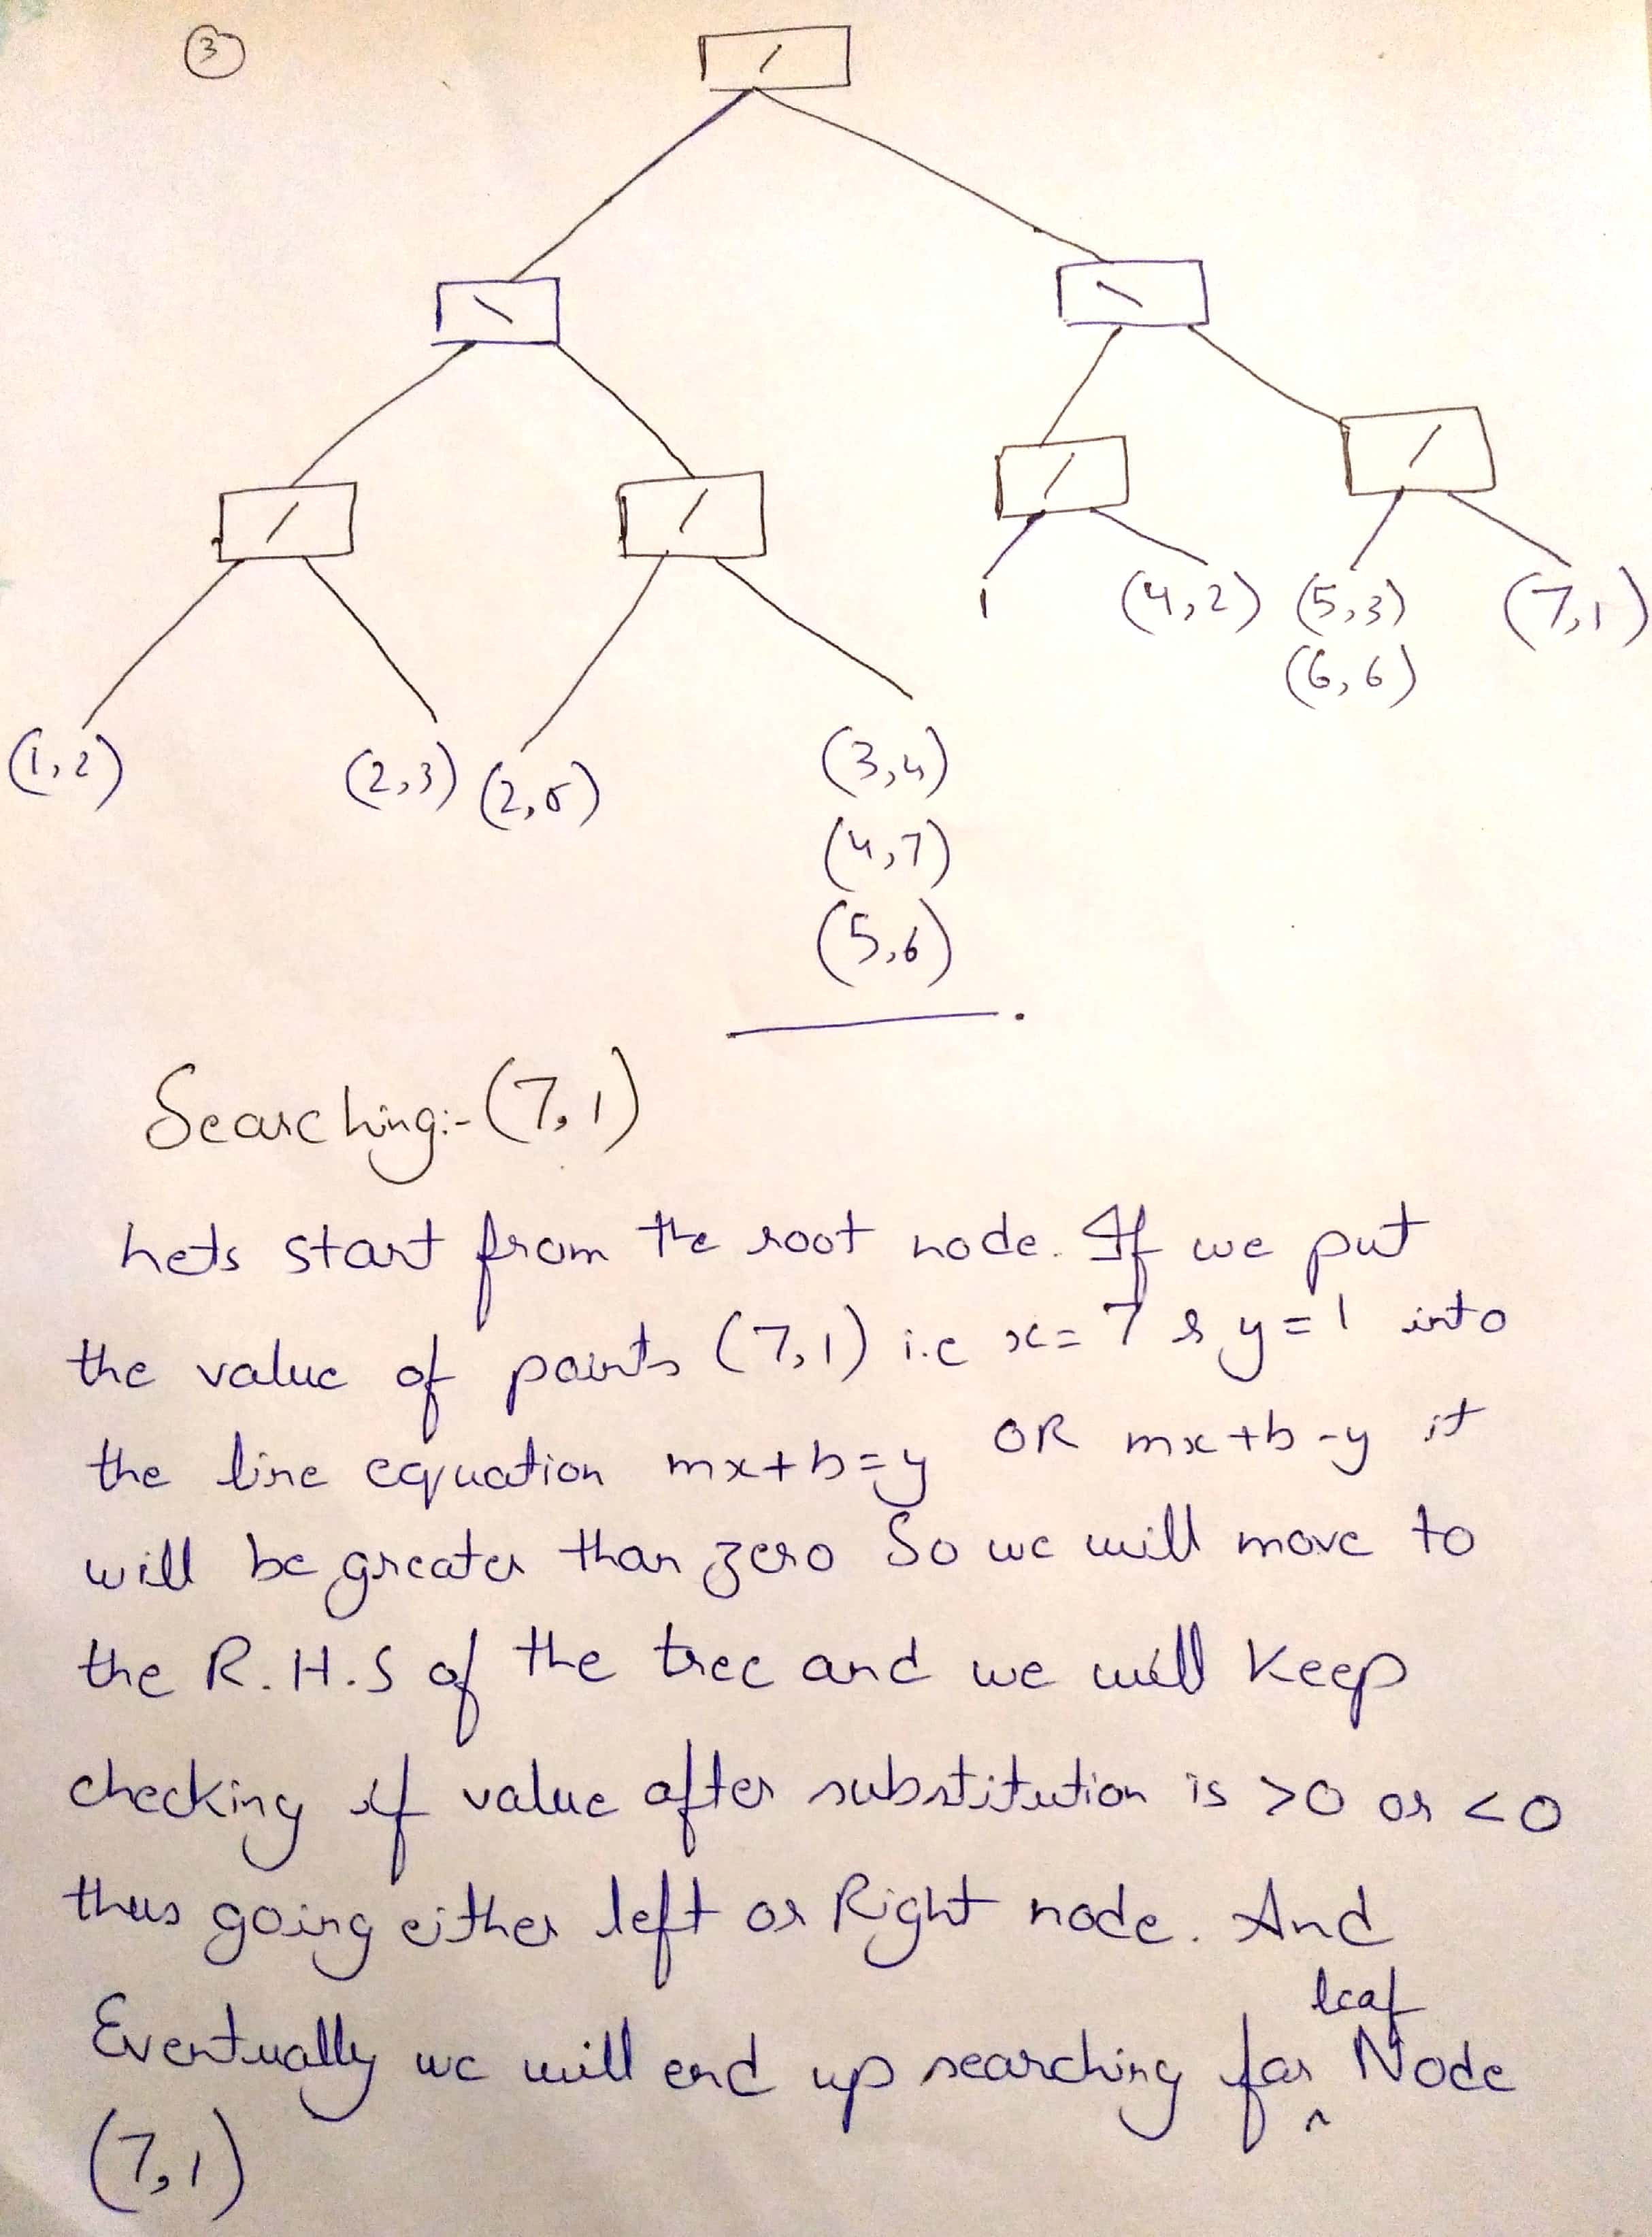

In [5]:
Image(filename='pic1.jpg')

## Ex-5


The problem with Nearest Neighbour is the optimization in approx- nearest neighbour of large datasets.
Let say,
    If we search a query of specific points, the ANN will start searching into the corresponding leaf nodes ignoring the points which lie on the leaf node of the other side of sub-tree,this search might end up choosing the nearest neighbour which actually is not the ANN, i.e the actual nearest neighbour might be on the other quadrant of the subtree.
    
There are several techniques which are used to optimize the nearest neighbour search. One of them is  LSH or Locality-Sensitive Hashing (LSH).One general approach to LSH is to “hash” items several times,in such a way that similar items are more likely to be hashed to the same bucket than dissimilar.

LSH is a hash function that maximizes the probability of similar items in data sets.The LSH or often called MinHash are applied to large scale clusters e.g finding similar web-pages or similar documents i.e plagiarism etc.There is a remarkable connection between the jaccard similarity coefficient and LSH
The Jaccard similarity coefficient is mostly used for checking similarity between two sets. Suppose we have two sets C and D or here we may say them as data points then it is defined as ratio of number of elements of their intersection to their union,Also written as J(C,D).The goal of MinHash or Locality Sensitive Hashing is to estimate J(C,D) quickly.


Links Studied:

- https://en.wikipedia.org/wiki/MinHash
- http://www.mit.edu/~andoni/LSH/
- https://en.wikipedia.org/wiki/Locality-sensitive_hashing
- https://web.stanford.edu/class/cs345a/slides/04-highdim.pdf
- http://www.cs.jhu.edu/%7Evandurme/papers/VanDurmeLallACL10-slides.pdf
- http://infolab.stanford.edu/~ullman/mmds/ch3a.pdf



#### A similarity test for dataset using jaccard similarity

In [74]:

# A similarity test for dataset using jaccard similarity

a = {'mahir', 'raza', 'hannan'}
b = {'mahir', 'asif', 'hannan', 'raza'}
c = {'mahir', 'yellow', 'car'}

similarity_ab=float(len(a.intersection(b))) / len(a.union(b))
similarity_ac=float(len(a.intersection(c))) / len(a.union(c))

#Here a and b are similary
print (similarity_ab)
#while a and c are not
print (similarity_ac)

0.75
0.2
